# Business Opportunities Analysis

### Setting up

In [102]:
## Importing necessary modules

import pandas as pd
import numpy as np
import textwrap as tw
import matplotlib.pyplot as plt

In [103]:
## Store data to dataframe.

biz_2010 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Business Opportunities/businessopportunities_2010.csv")
interest = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Business Opportunities/interest_in_business.csv")

## Data Cleaning

In [104]:
biz_2010.describe()

,year,share_interested,gdp_per_capita,population_estimate,days_to_start
count,1994.000000,467.000000,1941.000000,1.864000e+03,1994.000000
mean,2014.588766,22.219636,19628.344834,7.486356e+07,25.582357
std,2.851817,15.813125,19853.209459,5.522941e+08,37.218140
min,2010.000000,0.980000,751.664124,1.782100e+04,0.500000
25%,2012.000000,10.075000,4654.063965,2.098074e+06,9.000000
50%,2015.000000,16.770000,12506.529297,8.036614e+06,16.000000
75%,2017.000000,30.230000,28430.984375,2.728247e+07,30.829206
max,2019.000000,79.080000,116518.273438,7.764951e+09,690.000000


In [122]:
## Cleaning of columns.

biz_2010["time_category"] = biz_2010["time_category"].fillna("Very Fast")
biz_2010["time_category"] = biz_2010["time_category"].replace("Very slow","Very Slow")

biz_2010["time_category"].value_counts()

## Null values will not be included in analyses. 

Very Fast    1170
Fast          607
Slow          150
Very Slow      46
none           21
Name: time_category, dtype: int64

In [106]:
interest.describe()

,year,share_interested,gdp_per_capita,population_estimate
count,58550.000000,817.000000,6166.000000,5.809900e+04
mean,1605.270470,19.377283,17879.286262,4.896145e+07
std,1421.759656,15.094536,20132.683171,2.929329e+08
min,-10000.000000,0.750000,436.720367,0.000000e+00
25%,1833.000000,8.180000,3678.829102,1.447235e+05
50%,1902.000000,14.190000,10365.778320,1.376932e+06
75%,1967.000000,26.690000,25832.031738,6.518790e+06
max,2021.000000,90.950000,161971.468750,7.909295e+09


In [107]:
interest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58550 entries, 0 to 58549
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   entity               58550 non-null  object 
 1   code                 54866 non-null  object 
 2   year                 58550 non-null  int64  
 3   share_interested     817 non-null    float64
 4   gdp_per_capita       6166 non-null   float64
 5   population_estimate  58099 non-null  float64
 6   continent            285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 3.1+ MB


In [108]:
biz_2010

,country,year,share_interested,gdp_per_capita,population_estimate,days_to_start,time_category
0,Congo,2012,NaN,5504.185059,4713260.0,158.5,Very slow
1,East Timor,2010,NaN,2931.431641,1088492.0,110.0,Very slow
2,Equatorial Guinea,2010,NaN,34732.218750,1094538.0,155.0,Very slow
3,Equatorial Guinea,2011,NaN,35377.738281,1144590.0,150.0,Very slow
4,Equatorial Guinea,2012,NaN,36671.359375,1193641.0,150.0,Very slow
...,...,...,...,...,...,...,...
1989,Zambia,2015,NaN,3443.553223,16248231.0,8.5,Very Fast
1990,Zambia,2016,NaN,3467.887451,16767758.0,8.5,Very Fast
1991,Zambia,2017,NaN,3485.021729,17298056.0,8.5,Very Fast
1992,Zambia,2018,NaN,3521.545898,17835898.0,8.5,Very Fast


## Data Analysis

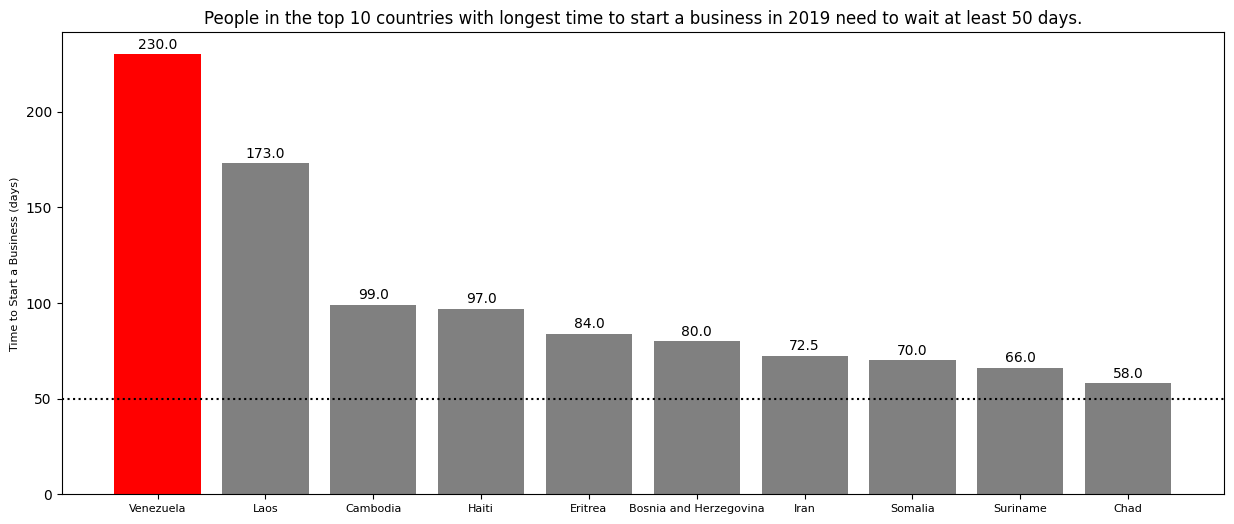

In [109]:
## The countries with the longest days to start a business.

data = biz_2010.loc[biz_2010["year"] >= 2019]
data = data.sort_values(by=["days_to_start"],ascending=False)

data_y = data["days_to_start"].head(10)
data_x = data["country"].head(10)

maxval = data_x.max()

plt.figure(figsize=(15,6))
plt.bar(data_x,data_y,color=["red" if country == maxval else "gray" for country in data_x])
plt.title("People in the top 10 countries with longest time to start a business in 2019 need to wait at least 50 days.")
plt.xticks(fontsize=8)
plt.axhline(50,linestyle=":",color="black")

for i,v in enumerate(data_y):
  plt.text(i,v+3,str(v),ha="center")

plt.ylabel("Time to Start a Business (days)",fontsize=8)

plt.show()

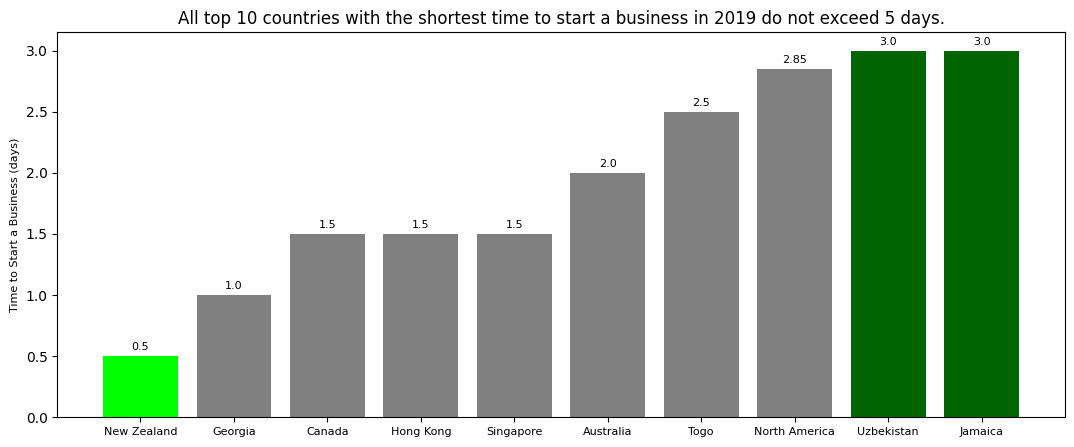

In [110]:
## The countries with the shortest time it takes to start a business.

data = biz_2010.loc[biz_2010["year"] >= 2019]
data = data.sort_values(by=["days_to_start"],ascending=True)

data_y = data["days_to_start"].head(10)
data_x = data["country"].head(10)

minval = data_y[data_y.idxmin()]
maxval = data_y[data_y.idxmax()]
plt.figure(figsize=(13,5))
plt.bar(data_x,data_y,color=["lime" if data == minval else "darkgreen" if data == maxval else "gray" for data in data_y])
plt.title("All top 10 countries with the shortest time to start a business in 2019 do not exceed 5 days.")
plt.xticks(fontsize=8)
##plt.axhline(50,linestyle=":",color="black")

for i,v in enumerate(data_y):
  plt.text(i,v+0.05,str(round(v,2)),ha="center",fontsize=8)

plt.ylabel("Time to Start a Business (days)",fontsize=8)

plt.show()



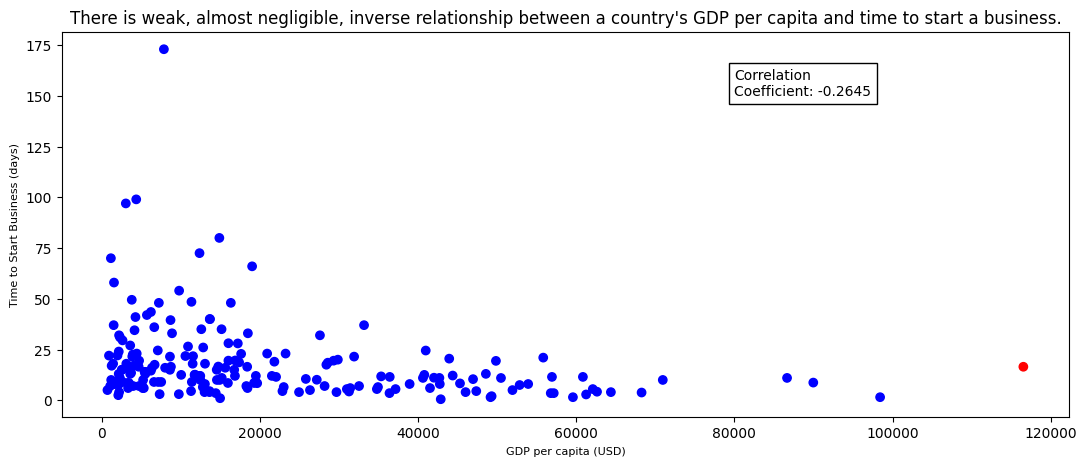

In [111]:
## Identify the correlation between gdp per capita and time to start a business in 2019

data = biz_2010.loc[biz_2010["year"] >= 2019]
data_country = data["country"]
data_gdp = data["gdp_per_capita"]
data_time = data["days_to_start"]

maxval = data_gdp[data_gdp.idxmax()]

plt.figure(figsize=(13,5))
plt.scatter(data_gdp,data_time,color=["red" if value == maxval else "blue" for value in data_gdp])
corr_coefficient = data_gdp.corr(data_time)
text = tw.fill(f'Correlation Coefficient: {str(round(corr_coefficient,4))}',width=20)
plt.xlabel("GDP per capita (USD)",fontsize=8)
plt.ylabel("Time to Start Business (days)",fontsize=8)
plt.text(80_000,150,text,fontsize=10,bbox={"facecolor":"white","edgecolor":"black"})
plt.title("There is weak, almost negligible, inverse relationship between a country's GDP per capita and time to start a business.",fontsize=12)

plt.show()

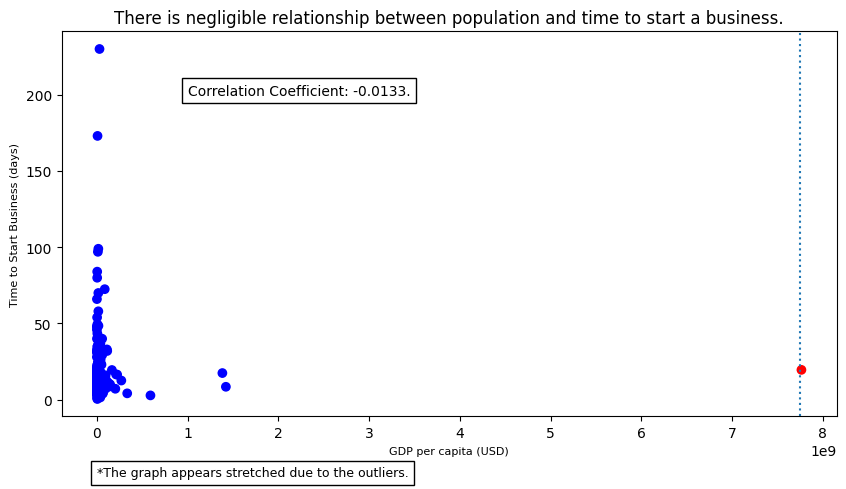

In [112]:
## Identify the correlation between population and time to start a business in 2019

data = biz_2010.loc[biz_2010["year"] >= 2019]
data_country = data["country"]
data_pop = data["population_estimate"]
data_time = data["days_to_start"]

maxval = data_pop[data_pop.idxmax()]

plt.figure(figsize=(10,5))
plt.scatter(data_pop,data_time,color=["red" if value == maxval else "blue" for value in data_pop])
corr_coefficient = data_pop.corr(data_time)
plt.xlabel("GDP per capita (USD)",fontsize=8)
plt.ylabel("Time to Start Business (days)",fontsize=8)

text = tw.fill(f'Correlation Coefficient: {str(round(corr_coefficient,4))}.',width=50)
plt.text(1*1e9,200,text,fontsize=10,bbox={"facecolor":"white","edgecolor":"black"})

text = tw.fill(f'*The graph appears stretched due to the outliers.',width=100)
plt.text(0,-50,text,fontsize=9,bbox={"facecolor":"white","edgecolor":"black"})
plt.title("There is negligible relationship between population and time to start a business.",fontsize=12)

plt.axvline(7.75*1e9,linestyle=":")

plt.show()


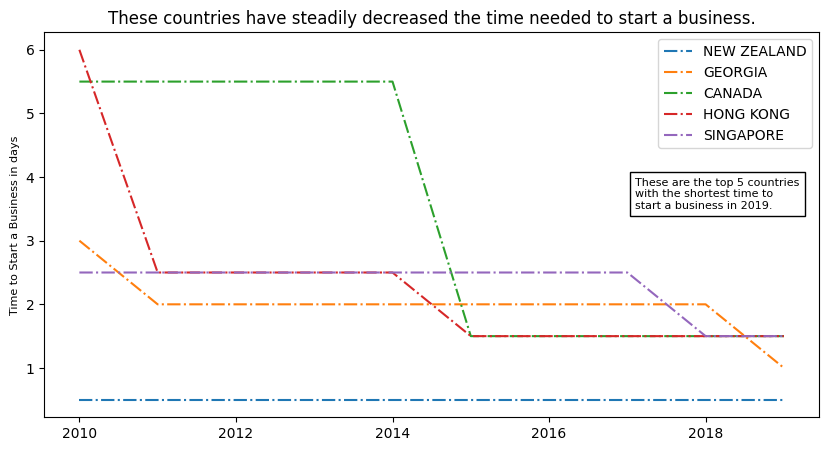

In [113]:
## Time it takes to start a business throughout time.

data = biz_2010.sort_values(by="year",ascending=True)
data_x = data["year"]
data_y = data["days_to_start"]

##countries = ['New Zealand','Georgia','Canada', 'Hong Kong', 'Singapore', 'Australia'
## 'Togo', 'North America', 'Uzbekistan', 'Jamaica']

countries = ['New Zealand','Georgia','Canada', 'Hong Kong', 'Singapore']

plt.figure(figsize=(10,5))
for country in countries:
  data_x = data.loc[data["country"] == country]["year"]
  data_y = data.loc[data["country"] == country]["days_to_start"]
  plt.plot(data_x,data_y,linestyle="-.",label=country.upper())
plt.legend()

plt.ylabel("Time to Start a Business in days",fontsize=8)
plt.title("These countries have steadily decreased the time needed to start a business.")

text = tw.fill("These are the top 5 countries with the shortest time to start a business in 2019.",width=30)
plt.text(2017.1,3.5,text,fontsize=8,bbox={"facecolor":"white","edgecolor":"black"})
plt.show()

In [ ]:
## The countries with the shortest time it takes to start a business.

data = biz_2010.loc[(biz_2010["year"] >= 2019) & (biz_2010["time_category"] != "none")]
data = data.groupby("time_category").agg("count").reset_index()
data_x = data["time_category"]
data_y = data["country"]



maxval = data["country"].max()
plt.figure(figsize=(10,5))
plt.barh(data_x,data_y,color=["green" if counts == maxval else "gray" for counts in data["country"]])
for i,v in enumerate(data["country"]):
  plt.text(v+3,i,v,ha="center",bbox={"facecolor":"white","edgecolor":"black"})
plt.title("People in at least 5% of the countries surveyed need longer than 50 days to start a business.")
text = 'Very Slow: > 100 days \n Slow: > 50 days and < 99 days \n Fast: > 20 days and < 49 days \n Very Fast: < 19 days'
plt.xticks(fontsize=8)
plt.ylabel("Time to Start a Business",fontsize=8)
plt.text(100,0,text, fontsize=8,bbox={"facecolor":"white","edgecolor":"black"})
plt.show()

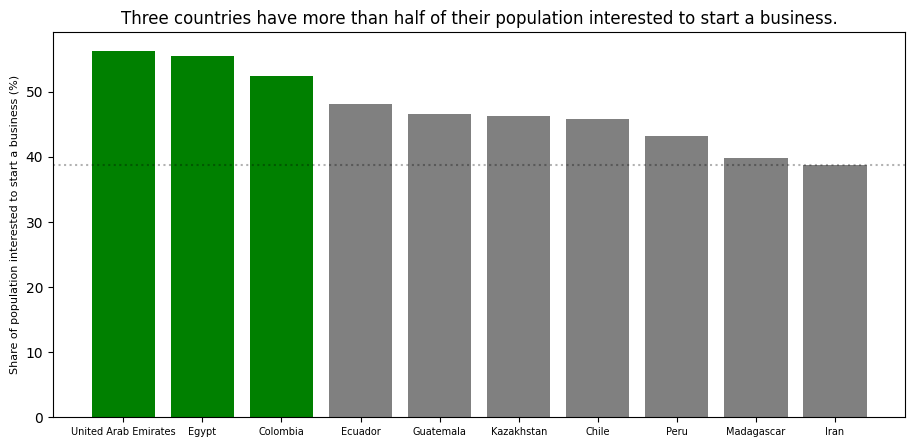

In [191]:
## The countries with the highest share of population interested to start a business in 2017

data = biz_2010.loc[(biz_2010["share_interested"].ge(0)) & (biz_2010["year"] == 2017)]
data = data.sort_values(by="share_interested",ascending=False).head(10)
data_x = data["country"]
data_y = data["share_interested"]

plt.figure(figsize=(11,5))
plt.bar(data_x,data_y,color=["green" if share > 50 else "gray" for share in data_y])
plt.xticks(fontsize=7)
plt.title("Three countries have more than half of their population interested to start a business.")
plt.ylabel("Share of population interested to start a business (%)",fontsize=8)
plt.axhline(data_y.min(),linestyle=":",alpha=0.3,color="black")
plt.show()

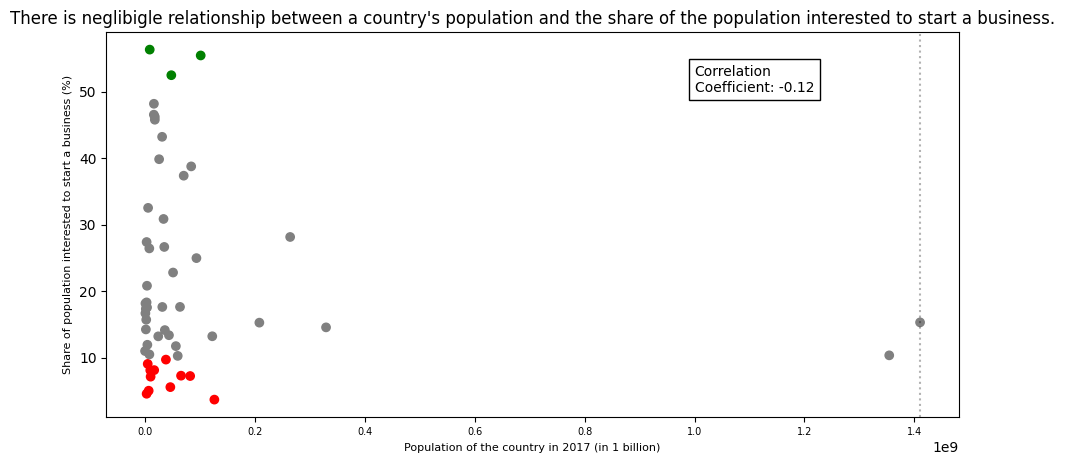

In [203]:
## Correlation between population  and share of the population interested to start a business.


data = biz_2010.loc[(biz_2010["share_interested"].ge(0)) & (biz_2010["year"] == 2017)]
data_x = data["population_estimate"]
data_y = data["share_interested"]

plt.figure(figsize=(11,5))
plt.scatter(data_x,data_y,color=["green" if (share > 50) else "red" if (share < 10) else "gray" for share in data_y])
plt.xticks(fontsize=7)
plt.title("On 2017, there is neglibigle relationship between a country's population and the share of the population interested to start a business.")
plt.ylabel("Share of population interested to start a business (%)",fontsize=8)
plt.xlabel("Population of the country in 2017 (in 1 billion)",fontsize=8)
plt.axvline(data_x.max(),linestyle=":",alpha=0.3,color="black")

coeff = data["share_interested"].corr(data["population_estimate"])

text = tw.fill(f'Correlation Coefficient: {round(coeff,2)}',width=20)
plt.text(1.0*1e9,50,text,fontsize=10,bbox={"facecolor":"white","edgecolor":"black"})
plt.show()

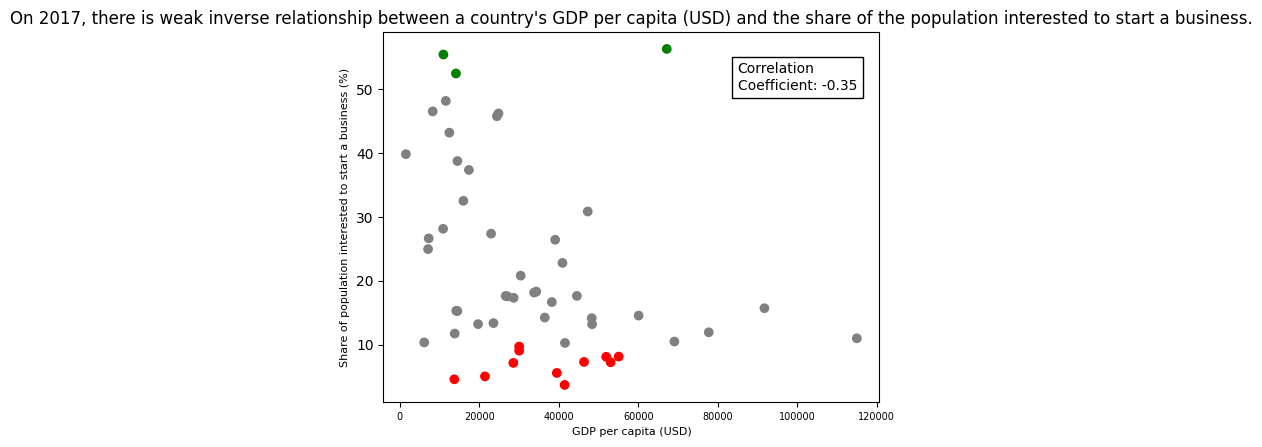

In [212]:
## Correlation between gdp per capita and share of the population interested to start a business.

data = biz_2010.loc[(biz_2010["share_interested"].ge(0)) & (biz_2010["year"] == 2017)]
data_x = data["gdp_per_capita"]
data_y = data["share_interested"]

##plt.figure(figsize=(8,5))
plt.scatter(data_x,data_y,color=["green" if (share > 50) else "red" if (share < 10) else "gray" for share in data_y])
plt.xticks(fontsize=7)
plt.title("On 2017, there is weak inverse relationship between a country's GDP per capita (USD) and the share of the population interested to start a business.")
plt.ylabel("Share of population interested to start a business (%)",fontsize=8)
plt.xlabel("GDP per capita (USD)",fontsize=8)
##plt.axvline(data_x.max(),linestyle=":",alpha=0.3,color="black")

coeff = data["share_interested"].corr(data["gdp_per_capita"])

text = tw.fill(f'Correlation Coefficient: {round(coeff,2)}',width=20)
plt.text(85_000,50,text,fontsize=10,bbox={"facecolor":"white","edgecolor":"black"})
plt.show()